In [ ]:
library(numbat)
library(dplyr)
library(Seurat)
library(ggplot2)
library(glue)
library(data.table)
library(ggtree)
library(stringr)
library(tidygraph)
library(patchwork)
library(tidyr)

library(viridis)

library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
databases_to_write = 

samps <- c("167", "322", "559", "708", "S408", "S410", "S914", "S956")
#samps <- c("167", "322")
pdf(paste0("all_samples_clones_GSEA.pdf"), width = 10, height = 10)

for (pat in samps[1:2]){

    mypal = c('1' = 'gray', '2' = "#377EB8", '3' = "#4DAF4A", '4' = "#984EA3", 
              '5'="#ff9768", '6'='#ae1717', '7'='#0f04b5', '8'="#f87382",
              '9'='green','10'='yellow','11'='deeppink')

    # Read-in numbat output
    nb = Numbat$new(out_dir = paste0('',pat, ''))

    # Sync-in sample Seurat object from AWS
    seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
    seu$barcode_orig <- rownames(seu@meta.data)

    # Single-cell CNV calls
    cnv_calls<- nb$joint_post %>% select(cell, CHROM, seg, cnv_state, p_cnv, p_cnv_x, p_cnv_y)
    cnv_calls %>% group_by(cnv_state) %>% arrange(p_cnv,desc=F)

    # Clone info
    clones<-dim(table(nb$clone_post$clone_opt))
    clone_info<-nb$clone_post
    seu$cell<-seu$barcode_orig
    seu@meta.data<-left_join(seu@meta.data,clone_info,by='cell')
    rownames(seu@meta.data)<-seu$barcode_orig

    print(DimPlot(seu, group.by = 'clone_opt',
            shuffle = T, raster=T,cols = mypal[1:clones]))
    
    
    Idents(seu) <- 'clone_opt'
    markers.seu <- FindAllMarkers(seu)
    for (clone in 1:clones){
    
        genes = markers.seu[markers.seu$cluster == clone & markers.seu$p_val_adj < 0.05 & 
              markers.seu$avg_log2FC >0, ]$gene

        setEnrichrSite("Enrichr") # Human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()



        dbs <- c("MSigDB_Hallmark_2020")

        enriched <- enrichr(genes, dbs)

        mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
        mut_enr_S410 = mut_enr_ch
        mut_enr <- mut_enr_ch
        dim(mut_enr)
        mp = "Meta-program n"
        cohort = "Sarcoma"
        enrichdbs = "MSigDB_Hallmark_2020"
        h_mut_enr <- mut_enr_S410[1:25,]#[1:500,]
        title <- paste("Sarcoma",pat, ": Clone ",clone,"\n EnrichR DB:",enrichdbs)
        ggp<- h_mut_enr %>%
          ggplot(aes(qscore, reorder(Term, qscore), fill = P.value)) +
          scale_fill_gradient(low = "red", high = "blue") +
          geom_bar(stat = "identity") +
          theme(legend.position = "bottom",
                axis.title.y = element_blank()
          ) +
          geom_text(
            aes(label = paste("P.val=", round(P.value,3))),
            color = "black",
            size = 4,
            hjust = 1, nudge_x = 2
          ) + theme_bw()
        
        myggp<-ggp + scale_y_discrete(labels = function(x) str_wrap(x, width = 50))+ggtitle(title) +xlab("qscore") + ylab("Description")
        print(myggp)
    }
}

                                  
dev.off()


In [ ]:
for (i in 1:clones) {
  # Code to be executed in each iteration
  print(i)
}

In [ ]:
clones.

In [ ]:
library(numbat)
library(dplyr)
library(Seurat)
library(ggplot2)
library(glue)
library(data.table)
library(ggtree)
library(stringr)
library(tidygraph)
library(patchwork)

library(viridis)

library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)
# Load Enrichr
listEnrichrSites()
setEnrichrSite("Enrichr") # Human genes
websiteLive <- TRUE
dbs <- listEnrichrDbs()
samps <- c("167", "322", "559", "708", "S408", "S410", "S914", "S956")
#samps <- c("167", "322")
pat = 'S956'
mypal = c('1' = 'gray', '2' = "#377EB8", '3' = "#4DAF4A", '4' = "#984EA3", 
              '5'="#ff9768", '6'='#ae1717', '7'='#0f04b5', '8'="#f87382",
              '9'='green','10'='yellow','11'='deeppink')
nb = Numbat$new(out_dir = paste0('',pat, ''))
# Sync-in sample Seurat object from AWS
seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
seu$barcode_orig <- rownames(seu@meta.data)
# Single-cell CNV calls
cnv_calls<- nb$joint_post %>% select(cell, CHROM, seg, cnv_state, p_cnv, p_cnv_x, p_cnv_y)
cnv_calls %>% group_by(cnv_state) %>% arrange(p_cnv,desc=F)
# Clone info
clones<-dim(table(nb$clone_post$clone_opt))
clone_info<-nb$clone_post
seu$cell<-seu$barcode_orig
seu@meta.data<-left_join(seu@meta.data,clone_info,by='cell')
rownames(seu@meta.data)<-seu$barcode_orig

print(DimPlot(seu, group.by = 'clone_opt',
            shuffle = T, raster=T,cols = mypal[1:clones]))
    
    
                             

In [ ]:

Idents(seu) <- 'clone_opt'
markers.seu <- FindAllMarkers(seu)    
clone_db <- list()
for (clone in 1:clones){
    
    genes = markers.seu[markers.seu$cluster == clone & markers.seu$p_val_adj < 0.05 & 
              markers.seu$avg_log2FC >0, ]$gene

    setEnrichrSite("Enrichr") # Human genes
    websiteLive <- TRUE
    dbs <- listEnrichrDbs()



    dbs <- c("MSigDB_Hallmark_2020")

    enriched <- enrichr(genes, dbs)

    mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
    mut_enr_S410 = mut_enr_ch
    mut_enr <- mut_enr_ch
    dim(mut_enr)
    mp = "Meta-program n"
    cohort = "Sarcoma"
    enrichdbs = "MSigDB_Hallmark_2020"
    h_mut_enr <- mut_enr_S410[1:25,]#[1:500,]
    mut_enr_S410$clone <- clone
    clone_db <- append(clone_db, list(mut_enr_S410))

    Sys.sleep(3)
  
}


In [ ]:
get_first_15_rownames <- function(df) {
  return((df$Term)[1:15])
}

# Apply the function to each dataframe in df_list and create a new list
first_15_rownames_list <- lapply(clone_db, get_first_15_rownames)

all_row_names <- unique(unlist(first_15_rownames_list))
length(all_row_names)

In [ ]:
library(tidyverse)

combined_df <- do.call(rbind, clone_db)

# Filter the dataframe to include only rows where term exists in all_terms
combined_df <- combined_df %>%
  filter(Term %in% all_row_names)

combined_df['log_pvalue'] <- -log10(combined_df$P.value)


p_values <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = P.value, 
                         id_cols = clone)

q_scores <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = qscore, 
                         values_fill = 0,
                         id_cols = clone)


p_values
q_scores

In [ ]:
fake_data %>%
  rownames_to_column(var = "gene") 

In [ ]:
library(tidyverse)
options(repr.plot.width=6, repr.plot.height=9)


fake_data <- data.frame(q_scores)

combined_df %>%
  filter(log_pvalue > 1.2) %>%
  ggplot() +
  geom_point(aes(x = factor(clone), y =  Term, size = qscore, color =  log_pvalue)) +
  scale_size_continuous(range = c(0, 10)) +
  labs(x = "Clone", y = "Pathway", title = "Dot Plot of qscore by Gene with qscore as Size and Color") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 0, hjust = 1))  # Rotates x-axis labels for better visibility


In [ ]:
combined_df

In [ ]:
combined_df <- do.call(rbind, clone_db)

# Filter the rows based on unique all_row_names
rows_to_plot <- combined_df[rownames(combined_df) %in% unique(all_row_names), ]

# Create a factor for the y variable to represent the index in all_row_names
rows_to_plot$row_index <- factor(rownames(rows_to_plot), levels = unique(all_row_names))
rows_to_plot$df_name <- factor(rownames(rows_to_plot), levels = unique(rownames(rows_to_plot)))

# Create the dot plot
ggplot(rows_to_plot, aes(x = df_name, y = row_index )) +
  geom_point() +
  scale_size_continuous(range = c(3, 10)) +
  labs(x = "Dataframe", y = "Row Index", title = "Grouped Dot Plot of Row Index by Dataframe with p_value as Size and qscore as Color") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotates x-axis labels for better visibility


In [ ]:
clone_db <- list()
samps <- c("167", "322", "559", "708", "S408", "S410", "S914", "S956")

for (pat in samps){
    
    mypal = c('1' = 'gray', '2' = "#377EB8", '3' = "#4DAF4A", '4' = "#984EA3", 
              '5'="#ff9768", '6'='#ae1717', '7'='#0f04b5', '8'="#f87382",
              '9'='green','10'='yellow','11'='deeppink')
    nb = Numbat$new(out_dir = paste0('',pat, ''))
    # Sync-in sample Seurat object from AWS
    seu<- readRDS(paste0("../data_Sarcoma", pat, "GEX_genes_300_UMI_600_annotated_for_infercnv.rds"))
    seu$barcode_orig <- rownames(seu@meta.data)
    # Single-cell CNV calls
    cnv_calls<- nb$joint_post %>% select(cell, CHROM, seg, cnv_state, p_cnv, p_cnv_x, p_cnv_y)
    cnv_calls %>% group_by(cnv_state) %>% arrange(p_cnv,desc=F)
    # Clone info
    clones<-dim(table(nb$clone_post$clone_opt))
    clone_info<-nb$clone_post
    seu$cell<-seu$barcode_orig
    seu@meta.data<-left_join(seu@meta.data,clone_info,by='cell')
    rownames(seu@meta.data)<-seu$barcode_orig

    print(DimPlot(seu, group.by = 'clone_opt',
                shuffle = T, raster=T,cols = mypal[1:clones]))


    Idents(seu) <- 'clone_opt'
    markers.seu <- FindAllMarkers(seu)  
    for (clone in 1:clones){

        genes = markers.seu[markers.seu$cluster == clone & markers.seu$p_val_adj < 0.05 & 
                  markers.seu$avg_log2FC >0, ]$gene

        setEnrichrSite("Enrichr") # Human genes
        websiteLive <- TRUE
        dbs <- listEnrichrDbs()



        dbs <- c("MSigDB_Hallmark_2020")
        Sys.sleep(3)
        enriched <- enrichr(genes, dbs)
        mut_enr_ch<-mutate(enriched[[1]], qscore = -log(Adjusted.P.value, base=10))
        mut_enr_S410 = mut_enr_ch
        mut_enr <- mut_enr_ch
        h_mut_enr <- mut_enr_S410[1:25,]#[1:500,]
        mut_enr_S410$clone <- clone
        mut_enr_S410$samp <- pat

        clone_db <- append(clone_db, list(mut_enr_S410))


    }

}

saveRDS(clone_db, "all_clone_pathways_to_graph.RDS")

In [1]:

library(numbat)
library(dplyr)
library(Seurat)
library(ggplot2)
library(glue)
library(data.table)
library(ggtree)
library(stringr)
library(tidygraph)
library(patchwork)
library(tidyr)

library(viridis)

library(enrichR)
library(ggplot2)
library(dplyr)
library(stringr)

clone_db <- readRDS('all_clone_pathways_to_graph.RDS')

Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


ggtree v3.7.1.002 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu.  Data Integration, Manipulation and Visualization of
Phylogenetic Trees (1st edition). Chapman and Hall/CRC. 2022,
doi:10.1201/9781003279242

Shuangbin Xu, Lin Li, Xi

In [2]:
clone_db

[[1]]
                                Term Overlap      P.value Adjusted.P.value
1                Allograft Rejection  54/200 3.028112e-14     1.514056e-12
2          Interferon Gamma Response  53/200 1.196089e-13     2.990222e-12
3      TNF-alpha Signaling via NF-kB  49/200 2.244588e-11     3.740981e-10
4                         Complement  45/200 2.736805e-09     3.421007e-08
5                            Hypoxia  43/200 2.552999e-08     2.552999e-07
6                     UV Response Dn  34/144 6.677565e-08     5.564638e-07
7                  Androgen Response  27/100 7.899413e-08     5.642438e-07
8                    Mitotic Spindle  41/199 1.837935e-07     1.148709e-06
9           IL-6/JAK/STAT3 Signaling   24/87 2.653362e-07     1.474090e-06
10              IL-2/STAT5 Signaling  39/199 1.369877e-06     6.849383e-06
11          PI3K/AKT/mTOR  Signaling  24/105 9.948946e-06     4.522248e-05
12                 Protein Secretion   22/96 2.202187e-05     8.846145e-05
13                         Apoptosis  31/161 2.299998e-05     8.846145e-05
14         Interferon Alpha Response   22/97 2.615533e-05     9.341190e-05
15             Inflammatory Response  34/200 1.322694e-04     4.133418e-04
16                 KRAS Signaling Up  34/200 1.322694e-04     4.133418e-04
17                TGF-beta Signaling   11/54 6.355684e-03     1.869319e-02
18                       Pperoxisome  17/104 8.719484e-03     2.237893e-02
19                   heme Metabolism  28/200 8.914658e-03     2.237893e-02
20   Reactive Oxygen Species Pathway   10/49 8.951572e-03     2.237893e-02
21                  mTORC1 Signaling  27/200 1.584110e-02     3.771689e-02
22         Unfolded Protein Response  17/113 1.912762e-02     4.347186e-02
23                   G2-M Checkpoint  25/200 4.462685e-02     9.701488e-02
24                   Notch Signaling    6/32 5.630761e-02     1.173075e-01
25                    UV Response Up  19/158 9.737074e-02     1.947415e-01
26                       p53 Pathway  23/200 1.076191e-01     2.069598e-01
27           Estrogen Response Early  22/200 1.575129e-01     2.916905e-01
28           Cholesterol Homeostasis    9/74 1.970653e-01     3.509947e-01
29                Hedgehog Signaling    5/36 2.035769e-01     3.509947e-01
30                        Glycolysis  21/200 2.215678e-01     3.692797e-01
31                   Apical Junction  20/200 2.995797e-01     4.831930e-01
32                       Coagulation  13/138 4.337557e-01     6.777432e-01
33               Pancreas Beta Cells    4/40 4.688255e-01     7.103417e-01
34        Wnt-beta Catenin Signaling    4/42 5.076976e-01     7.257076e-01
35             Fatty Acid Metabolism  14/158 5.221778e-01     7.257076e-01
36              Bile Acid Metabolism  10/112 5.225095e-01     7.257076e-01
37                      Adipogenesis  17/200 5.876995e-01     7.941885e-01
38                   Spermatogenesis  11/135 6.432657e-01     8.464022e-01
39            Estrogen Response Late  16/200 6.842033e-01     8.552541e-01
40 Epithelial Mesenchymal Transition  16/200 6.842033e-01     8.552541e-01
41                    Apical Surface    3/44 7.530340e-01     8.761994e-01
42                       E2F Targets  15/200 7.710555e-01     8.761994e-01
43                    Myc Targets V1  15/200 7.710555e-01     8.761994e-01
44             Xenobiotic Metabolism  15/200 7.710555e-01     8.761994e-01
45                      Angiogenesis    2/36 8.357012e-01     9.101852e-01
46         Oxidative Phosphorylation  14/200 8.438959e-01     9.101852e-01
47                        DNA Repair  10/150 8.555741e-01     9.101852e-01
48                    Myc Targets V2    2/58 9.678559e-01     9.972055e-01
49                        Myogenesis   9/200 9.929588e-01     9.972055e-01
50                 KRAS Signaling Dn   8/200 9.972055e-01     9.972055e-01
   Old.P.value Old.Adjusted.P.value Odds.Ratio Combined.Score
1            0                    0  3.9455687   1.228187e+02
2            0                    0  3.843681

In [3]:
non_malig_clones = c("167_1", "322_1", "559_1", "559_2","559_3","559_5","559_6",
                     "708_1","S408_1", "S410_1", "S914_1", "S956_1")

get_first_15_rownames <- function(df) {
    df$sample_viz <- paste(df$samp, df$clone, sep = "_")
    if (df$sample_viz[[1]] %in% non_malig_clones){
        print(df$sample_viz[[1]])
        return (list())
        print("Found")
    }
    return((df$Term)[1:5])
}

# Apply the function to each dataframe in df_list and create a new list
first_15_rownames_list <- lapply(clone_db, get_first_15_rownames)

all_row_names <- unique(unlist(first_15_rownames_list))
length(all_row_names)

[1] "167_1"
[1] "322_1"
[1] "559_1"
[1] "559_3"
[1] "559_6"
[1] "708_1"
[1] "S408_1"
[1] "S410_1"
[1] "S914_1"
[1] "S956_1"


[1] 24

In [4]:
library(tidyverse)

combined_df <- do.call(rbind, clone_db)

# Filter the dataframe to include only rows where term exists in all_terms
combined_df <- combined_df %>%
  filter(Term %in% all_row_names)


combined_df$sample_viz <- paste(combined_df$samp, combined_df$clone, sep = "_")
combined_df <- combined_df[!(combined_df$sample_viz %in% non_malig_clones), ]

combined_df['log_pvalue'] <- -log10(combined_df$P.value)


p_values <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = P.value, 
                         id_cols = sample_viz)

q_scores <- pivot_wider(data = combined_df, 
                         names_from = Term, 
                         values_from = qscore, 
                         values_fill = 0,
                         id_cols = sample_viz)


p_values 
q_scores

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   1.0.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ tidyr::expand()       masks ggtree::expand(), Matrix::expand()
✖ tidygraph::filter()   masks dplyr::filter(), stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stats::lag()
✖ data.table::last()    masks dplyr::last()
✖ tidyr::pack()         masks Matrix::pack()
✖ purrr::transpose()    masks data.table::transpose()
✖ tidyr::unpack()       masks Matrix::unpack()


sample_viz Epithelial Mesenchymal Transition UV Response Dn Apical Junction
1  167_2      9.466466e-37                      2.354129e-18   5.472953e-05   
2  167_3      3.580323e-57                      1.360538e-16   5.251043e-07   
3  167_4      3.401497e-46                      2.245677e-17   2.696585e-05   
4  167_5      9.027007e-46                      2.327737e-18   5.086453e-05   
5  322_2      7.283594e-03                      5.523081e-06   1.114610e-01   
6  322_3      1.621379e-03                      2.471939e-08   9.297095e-03   
7  322_4      6.338870e-15                      2.418148e-07   8.113901e-04   
8  322_5      4.857750e-28                      4.917503e-04   8.190467e-05   
9  322_6      1.413887e-05                      4.692869e-07   9.145499e-03   
10 322_7      1.413887e-05                      4.692869e-07   3.665245e-03   
11 559_4      1.525885e-65                      2.847953e-19   3.151804e-09   
12 708_2      2.453233e-27                      4.185142e-15   8.801436e-03   
13 708_3      2.120705e-42                      1.674459e-20   1.627967e-04   
14 708_4      1.546042e-34                      2.742272e-16   2.271676e-03   
15 708_5      5.285851e-56                      6.130494e-11   3.347889e-04   
16 708_6      9.725645e-28                      3.492007e-18   3.893064e-02   
17 S408_2     5.465870e-13                      6.071332e-05   2.420055e-01   
18 S408_3     2.442779e-26                      1.908381e-08   1.499083e-02   
19 S408_4     2.194626e-12                      2.265844e-08   1.384513e-01   
20 S408_5     1.294484e-10                      6.594571e-08   2.191382e-01   
21 S408_6     4.956953e-01                      3.887187e-01             NA   
22 S410_2     6.749109e-06                      6.873186e-04   8.475264e-01   
23 S410_3     8.101502e-09                      9.662242e-02   3.226304e-01   
24 S914_2     2.614216e-31                      7.889866e-04   6.286205e-07   
25 S914_3     2.404753e-06                      4.188151e-07   3.578026e-02   
26 S914_4     7.093696e-26                      2.445041e-05   5.712497e-03   
27 S914_5     2.703073e-10                      5.623749e-05   6.572001e-04   
28 S914_6     2.175562e-21                      7.010306e-04   4.529269e-03   
29 S956_2     7.051799e-01                      2.629275e-09   2.073598e-01   
30 S956_3     8.884458e-10                      2.805282e-01   4.730965e-01   
   Angiogenesis Mitotic Spindle Androgen Response Myogenesis   Coagulation 
1  1.224239e-04 1.419698e-03    0.0014274296      6.330820e-03 3.037378e-02
2  1.089956e-07 2.468318e-05    0.0009913507      6.778571e-03 2.812222e-03
3  2.336883e-05 1.425372e-07    0.0101618062      7.256947e-03 8.160231e-03
4  1.310650e-05 2.836448e-06    0.0055938929      2.920104e-02 2.633920e-02
5  4.294747e-01 6.952450e-03    0.3781112299      6.225217e-02 9.771824e-01
6  1.544022e-01 1.947969e-02    0.5269435156      1.386072e-01 8.982551e-01
7  7.466835e-04 5.018983e-02    0.6041997065      2.104385e-02 5.318211e-01
8  3.496072e-05 2.057227e-04    0.0027610215      2.912173e-07 1.407081e-07
9  4.633419e-03 2.048658e-02    0.1945564004      4.555736e-02 9.867666e-01
10 7.317741e-04 2.048658e-02    0.3698362881      1.644500e-01 8.009539e-01
11 1.141419e-07 6.361567e-08    0.0429825442      2.131816e-04 1.322554e-03
12 9.969653e-07 8.648128e-07    0.0864033138      4.425956e-02 2.617576e-02
13 2.294280e-06 1.154173e-06    0.0020687466      3.428522e-03 2.499044e-04
14 1.600017e-06 5.574954e-07    0.2238964381      3.013400e-02 8.014727e-02
15 6.187896e-09 2.220824e-10    0.0001393208      8.984117e-04 7.429587e-06
16 8.179826e-05 1.760485e-12    0.0103277968      1.475084e-01 2.960036e-03
17 1.561220e-01 2.402679e-01    0.0804834346      3.480530e-08 4.880315e-04
18 1.254531e-07 5.106042e-02    0.0051485863      1.499083e-02 2.537352e-02
19 3.208293e-05 8.378369e-02    0.0152676371      7.552833e-01 9.180036e-01
20 1.034329e-06 2.140876e-01    0.

sample_viz Epithelial Mesenchymal Transition UV Response Dn Apical Junction
1  167_2      3.433362e+01                      16.2390037     3.048703e+00   
2  167_3      5.474711e+01                      14.4683494     5.182844e+00   
3  167_4      4.378709e+01                      15.2684414     3.586915e+00   
4  167_5      4.334549e+01                      16.2351260     3.293585e+00   
5  322_2      9.426777e-01                       3.5857208     2.350216e-01   
6  322_3      1.428388e+00                       5.9442044     8.460162e-01   
7  322_4      1.253523e+01                       5.2547893     2.030072e+00   
8  322_5      2.563232e+01                       2.9057678     3.635899e+00   
9  322_6      3.487857e+00                       4.6658037     9.780947e-01   
10 322_7      3.487857e+00                       4.6658037     1.375199e+00   
11 559_4      6.312628e+01                      17.1563010     7.288366e+00   
12 708_2      2.492902e+01                      12.9980786     1.277295e+00   
13 708_3      3.999228e+01                      18.3959144     2.885264e+00   
14 708_4      3.212954e+01                      14.1816782     1.807510e+00   
15 708_5      5.358669e+01                       9.2212784     2.931161e+00   
16 708_6      2.533998e+01                      16.0858571     8.515539e-01   
17 S408_2     1.077098e+01                       3.2024756     4.258431e-01   
18 S408_3     2.393087e+01                       6.5152149     1.347053e+00   
19 S408_4     1.026947e+01                       6.5566340     3.445981e-01   
20 S408_5     8.197707e+00                       5.7916474     2.031015e-01   
21 S408_6     3.047852e-01                       0.3047852     0.000000e+00   
22 S410_2     3.537285e+00                       2.0064947     4.043829e-02   
23 S410_3     6.401238e+00                       0.6257560     2.924604e-01   
24 S914_2     2.894919e+01                       2.6155900     5.413241e+00   
25 S914_3     4.238718e+00                       4.6967364     5.432666e-01   
26 S914_4     2.351566e+01                       3.6772154     1.609706e+00   
27 S914_5     7.977078e+00                       2.9599395     2.068359e+00   
28 S914_6     1.904964e+01                       2.6554225     1.877316e+00   
29 S956_2     1.367487e-05                       6.8899680     1.367487e-05   
30 S956_3     7.680301e+00                       0.3270837     1.714664e-01   
   Angiogenesis Mitotic Spindle Androgen Response Myogenesis   Coagulation 
1  2.823998e+00  1.9334005      1.933400e+00      1.353442e+00 7.815476e-01
2  5.740742e+00  3.6867802      2.149901e+00      1.583835e+00 1.806223e+00
3  3.586915e+00  5.6419519      1.266030e+00      1.310146e+00 1.310146e+00
4  3.785603e+00  4.3253765      1.398414e+00      8.770244e-01 8.804274e-01
5  1.115022e-04  0.9426777      1.115022e-04      2.866947e-01 1.115022e-04
6  1.485886e-01  0.6497202      1.872017e-04      1.485886e-01 1.872017e-04
7  2.030072e+00  0.4147777      7.169415e-03      7.130869e-01 7.169415e-03
8  3.921306e+00  3.2607490      2.239417e+00      5.808784e+00 6.015538e+00
9  1.148462e+00  0.7247428      4.819665e-02      5.237816e-01 8.169146e-04
10 1.949986e+00  0.8039240      8.169146e-04      2.429822e-02 8.169146e-04
11 5.951329e+00  6.1082998      9.775418e-01      2.935297e+00 2.267572e+00
12 4.922139e+00  4.9221387      4.614096e-01      7.141443e-01 8.551019e-01
13 4.560172e+00  4.7336089      2.018816e+00      1.862833e+00 2.766083e+00
14 4.716694e+00  5.0496387      1.728316e-01      8.804614e-01 5.609981e-01
15 7.363359e+00  8.7414410      3.279731e+00      2.532420e+00 4.480232e+00
16 3.193309e+00 10.5593911      1.313894e+00      4.143579e-01 1.810848e+00
17 5.192942e-01  0.4258431      7.168752e-01      6.268023e+00 2.422250e+00
18 5.919247e+00  0.9168570      1.749518e+00      1.347053e+00 1.168327e+00
19 3.502500e+00  0.4658257      1.080275e+00      2.870415e-05 2.870415e-05
20 4.772266e+00  0.2031015      7.

In [5]:
combined_df

Term                              Overlap P.value      Adjusted.P.value
25  Epithelial Mesenchymal Transition 76/200  9.466466e-37 4.638568e-35    
26  UV Response Dn                    45/144  2.354129e-18 5.767615e-17    
27  Apical Junction                   30/200  5.472953e-05 8.939156e-04    
28  Angiogenesis                      10/36   1.224239e-04 1.499693e-03    
29  Mitotic Spindle                   26/199  1.419698e-03 1.165734e-02    
30  Androgen Response                 16/100  1.427430e-03 1.165734e-02    
31  Myogenesis                        24/200  6.330820e-03 4.431574e-02    
32  Coagulation                       16/138  3.037378e-02 1.653683e-01    
33  Protein Secretion                 10/96   1.300148e-01 5.308939e-01    
34  Hypoxia                           17/200  2.288320e-01 6.595747e-01    
35  Glycolysis                        17/200  2.288320e-01 6.595747e-01    
36  PI3K/AKT/mTOR  Signaling          8/105   4.479762e-01 9.985767e-01    
37  Hedgehog Signaling                2/36    7.247910e-01 9.985767e-01    
38  TNF-alpha Signaling via NF-kB     11/200  8.291169e-01 9.985767e-01    
39  KRAS Signaling Dn                 11/200  8.291169e-01 9.985767e-01    
40  Apoptosis                         8/161   8.790514e-01 9.985767e-01    
41  G2-M Checkpoint                   10/200  8.959370e-01 9.985767e-01    
42  mTORC1 Signaling                  9/200   9.425634e-01 9.985767e-01    
43  E2F Targets                       9/200   9.425634e-01 9.985767e-01    
44  Interferon Alpha Response         3/97    9.687991e-01 9.985767e-01    
45  Myc Targets V2                    1/58    9.848096e-01 9.985767e-01    
46  Unfolded Protein Response         3/113   9.871832e-01 9.985767e-01    
47  Oxidative Phosphorylation         6/200   9.954277e-01 9.985767e-01    
48  Myc Targets V1                    5/200   9.985767e-01 9.985767e-01    
49  Epithelial Mesenchymal Transition 98/200  3.580323e-57 1.790162e-55    
50  UV Response Dn                    44/144  1.360538e-16 3.401344e-15    
51  Angiogenesis                      14/36   1.089956e-07 1.816593e-06    
52  Apical Junction                   36/200  5.251043e-07 6.563804e-06    
53  Myc Targets V1                    33/200  1.072012e-05 1.072012e-04    
54  Mitotic Spindle                   32/199  2.468318e-05 2.056931e-04    
⋮   ⋮                                 ⋮       ⋮            ⋮               
817 Myc Targets V2                    1/58    9.876419e-01 9.999685e-01    
818 KRAS Signaling Dn                 7/200   9.920904e-01 9.999685e-01    
819 mTORC1 Signaling                  6/200   9.971807e-01 9.999685e-01    
820 TNF-alpha Signaling via NF-kB     5/200   9.991599e-01 9.999685e-01    
821 Interferon Alpha Response         1/97    9.993580e-01 9.999685e-01    
822 Apoptosis                         3/161   9.995342e-01 9.999685e-01    
823 Coagulation                       1/138   9.999685e-01 9.999685e-01    
824 Myc Targets V1                    26/200  7.276615e-19 3.420009e-17    
825 Epithelial Mesenchymal Transition 17/200  8.884458e-10 2.087848e-08    
826 Oxidative Phosphorylation         11/200  5.633275e-05 8.825465e-04    
827 Unfolded Protein Response         8/113   1.038659e-04 1.220424e-03    
828 mTORC1 Signaling                  10/200  2.654307e-04 2.495048e-03    
829 E2F Targets                       7/200   1.476059e-02 6.937476e-02    
830 Glycolysis                        7/200   1.476059e-02 6.937476e-02    
831 Apoptosis                         6/161   1.766305e-02 7.546938e-02    
832 Myc Targets V2                    3/58    3.819881e-02 1.496120e-01    
833 Hypoxia                           6/200   4.417906e-02 1.500863e-01    
834 Angiogenesis                      2/36    7.739323e-02 2.273426e-01    
835 Coagulation                       4/138   1.014409e-01 2.566706e-01    
836 G2-M Checkpoint                   5/200   1.146826e-01 2.566706e-01    
837 PI3K/AKT/mTOR  Signaling          3/105   1.5171

In [10]:
combined_df$sample_viz <- sub("^(?!S)", "S", combined_df$sample_viz, perl=TRUE)
combined_df$sample_viz <- gsub("_", ", clone ", combined_df$sample_viz)

combined_df

Term                              Overlap P.value      Adjusted.P.value
25  Epithelial Mesenchymal Transition 76/200  9.466466e-37 4.638568e-35    
26  UV Response Dn                    45/144  2.354129e-18 5.767615e-17    
27  Apical Junction                   30/200  5.472953e-05 8.939156e-04    
28  Angiogenesis                      10/36   1.224239e-04 1.499693e-03    
29  Mitotic Spindle                   26/199  1.419698e-03 1.165734e-02    
30  Androgen Response                 16/100  1.427430e-03 1.165734e-02    
31  Myogenesis                        24/200  6.330820e-03 4.431574e-02    
32  Coagulation                       16/138  3.037378e-02 1.653683e-01    
33  Protein Secretion                 10/96   1.300148e-01 5.308939e-01    
34  Hypoxia                           17/200  2.288320e-01 6.595747e-01    
35  Glycolysis                        17/200  2.288320e-01 6.595747e-01    
36  PI3K/AKT/mTOR  Signaling          8/105   4.479762e-01 9.985767e-01    
37  Hedgehog Signaling                2/36    7.247910e-01 9.985767e-01    
38  TNF-alpha Signaling via NF-kB     11/200  8.291169e-01 9.985767e-01    
39  KRAS Signaling Dn                 11/200  8.291169e-01 9.985767e-01    
40  Apoptosis                         8/161   8.790514e-01 9.985767e-01    
41  G2-M Checkpoint                   10/200  8.959370e-01 9.985767e-01    
42  mTORC1 Signaling                  9/200   9.425634e-01 9.985767e-01    
43  E2F Targets                       9/200   9.425634e-01 9.985767e-01    
44  Interferon Alpha Response         3/97    9.687991e-01 9.985767e-01    
45  Myc Targets V2                    1/58    9.848096e-01 9.985767e-01    
46  Unfolded Protein Response         3/113   9.871832e-01 9.985767e-01    
47  Oxidative Phosphorylation         6/200   9.954277e-01 9.985767e-01    
48  Myc Targets V1                    5/200   9.985767e-01 9.985767e-01    
49  Epithelial Mesenchymal Transition 98/200  3.580323e-57 1.790162e-55    
50  UV Response Dn                    44/144  1.360538e-16 3.401344e-15    
51  Angiogenesis                      14/36   1.089956e-07 1.816593e-06    
52  Apical Junction                   36/200  5.251043e-07 6.563804e-06    
53  Myc Targets V1                    33/200  1.072012e-05 1.072012e-04    
54  Mitotic Spindle                   32/199  2.468318e-05 2.056931e-04    
⋮   ⋮                                 ⋮       ⋮            ⋮               
817 Myc Targets V2                    1/58    9.876419e-01 9.999685e-01    
818 KRAS Signaling Dn                 7/200   9.920904e-01 9.999685e-01    
819 mTORC1 Signaling                  6/200   9.971807e-01 9.999685e-01    
820 TNF-alpha Signaling via NF-kB     5/200   9.991599e-01 9.999685e-01    
821 Interferon Alpha Response         1/97    9.993580e-01 9.999685e-01    
822 Apoptosis                         3/161   9.995342e-01 9.999685e-01    
823 Coagulation                       1/138   9.999685e-01 9.999685e-01    
824 Myc Targets V1                    26/200  7.276615e-19 3.420009e-17    
825 Epithelial Mesenchymal Transition 17/200  8.884458e-10 2.087848e-08    
826 Oxidative Phosphorylation         11/200  5.633275e-05 8.825465e-04    
827 Unfolded Protein Response         8/113   1.038659e-04 1.220424e-03    
828 mTORC1 Signaling                  10/200  2.654307e-04 2.495048e-03    
829 E2F Targets                       7/200   1.476059e-02 6.937476e-02    
830 Glycolysis                        7/200   1.476059e-02 6.937476e-02    
831 Apoptosis                         6/161   1.766305e-02 7.546938e-02    
832 Myc Targets V2                    3/58    3.819881e-02 1.496120e-01    
833 Hypoxia                           6/200   4.417906e-02 1.500863e-01    
834 Angiogenesis                      2/36    7.739323e-02 2.273426e-01    
835 Coagulation                       4/138   1.014409e-01 2.566706e-01    
836 G2-M Checkpoint                   5/200   1.146826e-01 2.566706e-01    
837 PI3K/AKT/mTOR  Signaling          3/105   1.5171

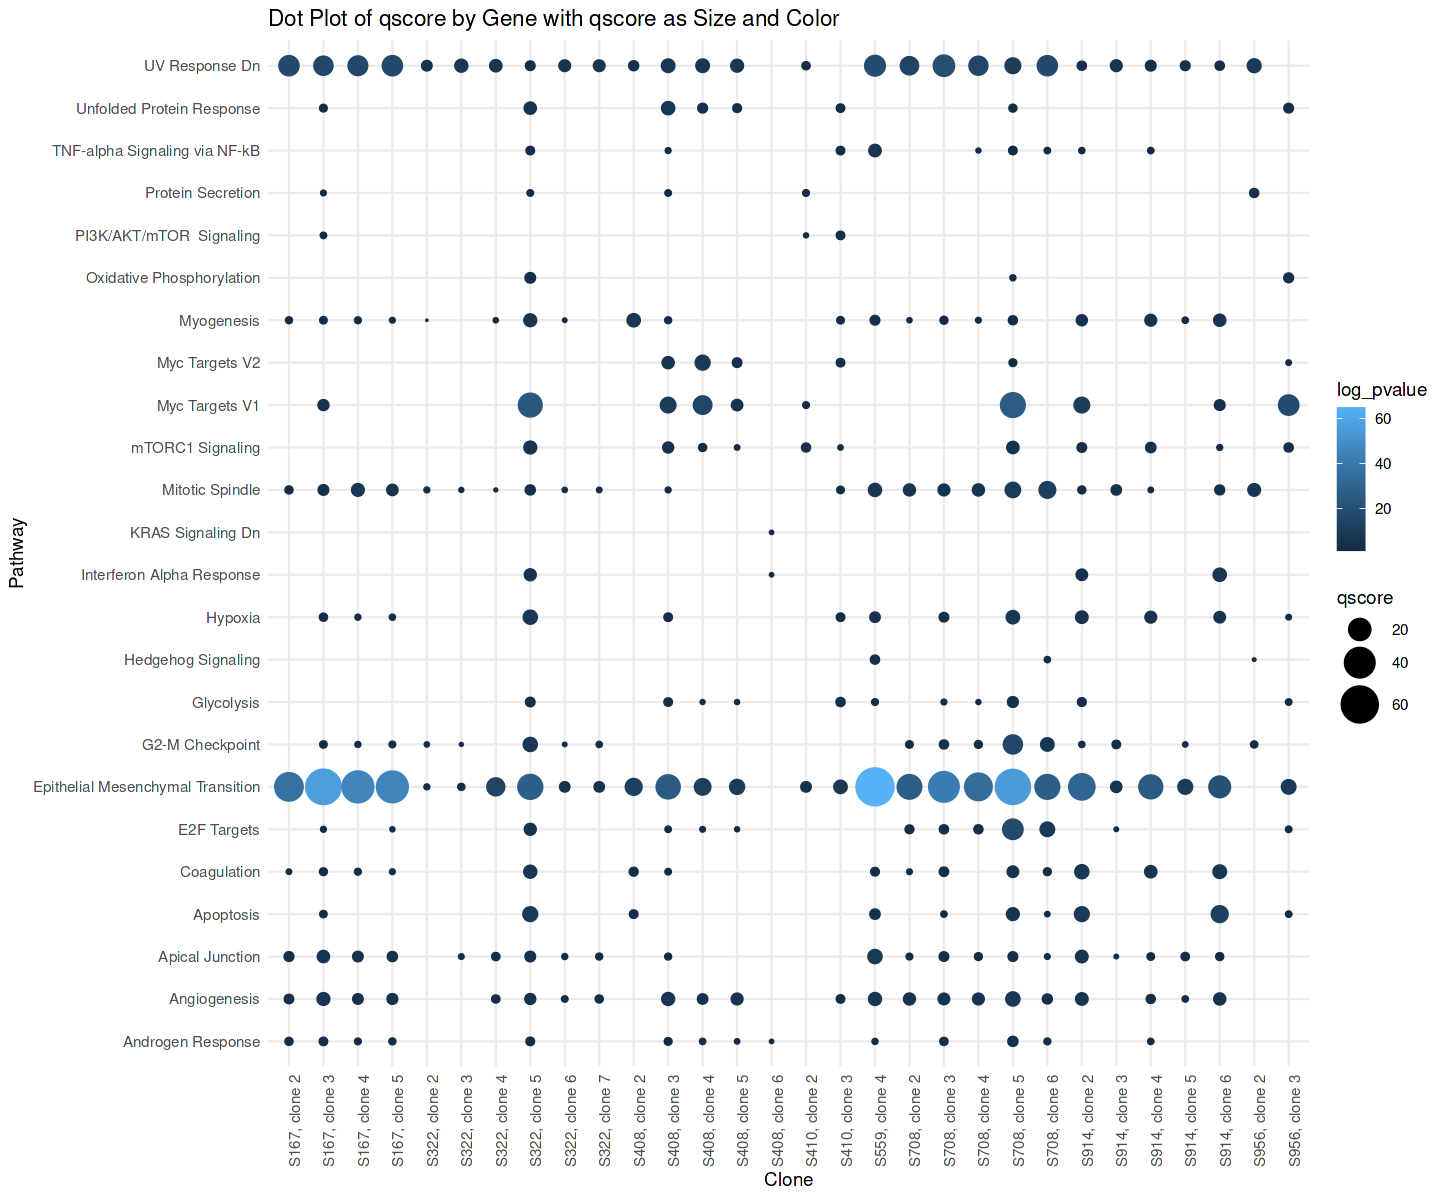

In [11]:
library(tidyverse)
options(repr.plot.width=12, repr.plot.height = 10)


fake_data <- data.frame(q_scores)

combined_df %>%
  filter(log_pvalue > 1.2) %>%
  ggplot() +
  geom_point(aes(x = factor(sample_viz), y =  Term, size = qscore, color =  log_pvalue)) +
  scale_size_continuous(range = c(0, 10)) +
  labs(x = "Clone", y = "Pathway", title = "Dot Plot of qscore by Gene with qscore as Size and Color") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

In [7]:
typeof(combined_df$sample_viz)

[1] "character"

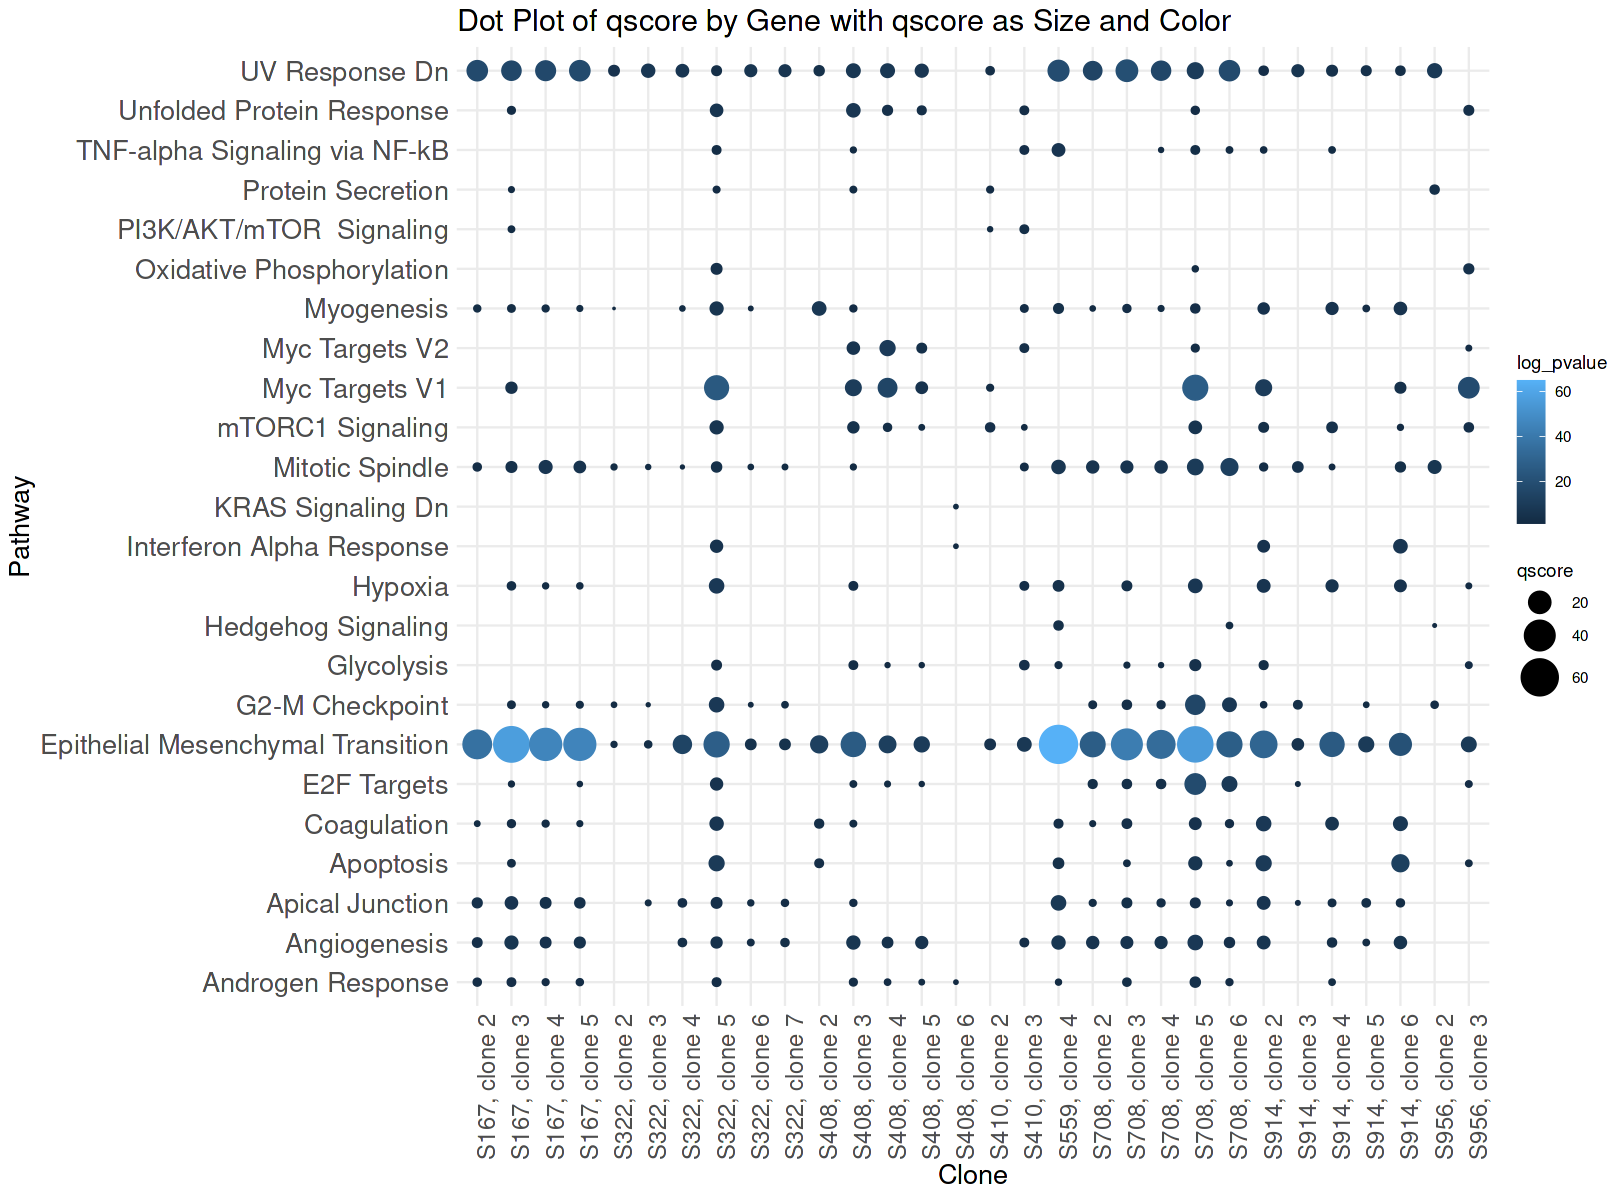

In [23]:
library(tidyverse)
options(repr.plot.width = 13.5, repr.plot.height = 10)

fake_data <- data.frame(q_scores)

combined_df %>%
  filter(log_pvalue > 1.2) %>%
  ggplot() +
  geom_point(aes(x = factor(sample_viz), y = Term, size = qscore, color = log_pvalue)) +
  scale_size_continuous(range = c(0, 10)) +
  labs(x = "Clone", y = "Pathway", title = "Dot Plot of qscore by Gene with qscore as Size and Color") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 14),  # Increase x-axis text size
    axis.text.y = element_text(size = 16),  # Increase y-axis text size
    axis.title = element_text(size = 16),  # Increase axis title text size
    plot.title = element_text(size = 18)  # Increase plot title text size
  )
